2500000.0
1/1 [==============================] - 0s 251ms/step
5000000.0
1/1 [==============================] - 0s 70ms/step


C:\Users\REZA\AppData\Local\Temp\ipykernel_16600\2369194234.py:45: RuntimeWarning: divide by zero encountered in log
  k = np.log(self.epsilon / min_epsilon) / total_episodes
C:\Users\REZA\AppData\Local\Temp\ipykernel_16600\2369194234.py:46: RuntimeWarning: invalid value encountered in scalar multiply
  self.epsilon = min_epsilon + (self.epsilon - min_epsilon) * np.exp(-k * episode * 0.9)  # Decay the exploration rate


1/1 [==============================] - 0s 72ms/step
7500000.0
1/1 [==============================] - 0s 82ms/step
10000000.0
1/1 [==============================] - 0s 77ms/step
15000000.0
1/1 [==============================] - 0s 74ms/step


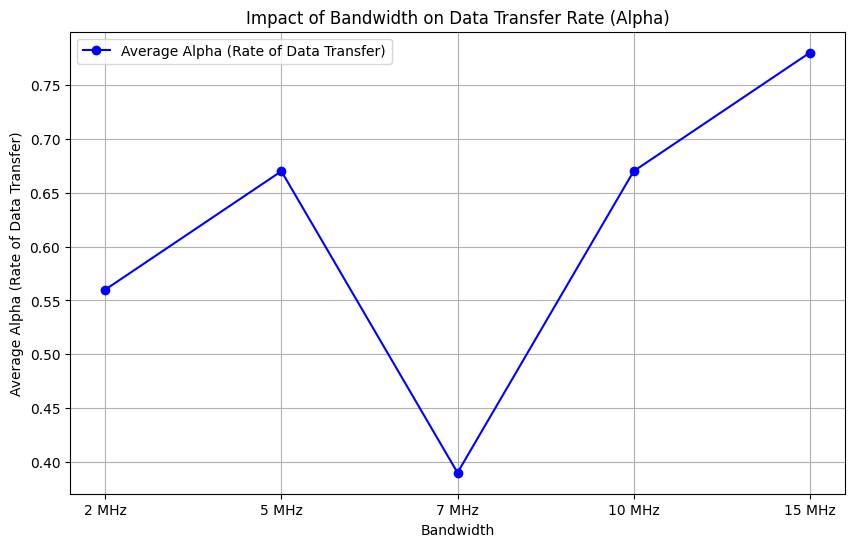

In [36]:
# Assuming you have the EdgeComputingEnvironment and DDQNAgent defined as per your code
env = EdgeComputingEnvironment()

# Define the bandwidth values to test (in Hz)
bandwidth_values = [2.5, 5, 7.5, 10, 15]  # Example values in Hz

# Define the number of users/devices
num_users = env.M

# Initialize the DDQN agent
agent = DDQNAgent(env, num_users)

# Define the number of episodes for training and testing steps
num_train_episodes = 1  # or any suitable number for training
num_test_steps = 1       # or any suitable number for testing

# Create the folder for DDQN model files if it doesn't exist
model_folder = 'DDQN_Models_Test_Bandwidth'
os.makedirs(model_folder, exist_ok=True)

# Storage for results
results = []

# Train and save DDQN models for different bandwidth values
for bandwidth in bandwidth_values:
    env.B = bandwidth * 1e6  # Set the bandwidth in the environment
    print(env.B)
    # Train the agent
    agent.train(num_train_episodes)

    # Save the model for this configuration
    model_filename = os.path.join(model_folder, f'DDQN_model_Bandwidth_{int(bandwidth)}MHz.h5')
    agent.save(model_filename)

    # Test and collect metrics
    avg_delay, avg_alpha = agent.test(num_test_steps)

    # Store the results
    results.append({
        'bandwidth': bandwidth,
        'avg_alpha': avg_alpha
    })

# Save the results to a file
with open('DDQN_Bandwidth_results.json', 'w') as f:
    json.dump(results, f)

# Extract the alpha values for plotting
alpha_values = [result['avg_alpha'] for result in results]
bandwidth_labels = [f"{int(bw)} MHz" for bw in bandwidth_values]

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(bandwidth_labels, alpha_values, marker='o', linestyle='-', color='blue', label='Average Alpha (Rate of Data Transfer)')
plt.xlabel('Bandwidth')
plt.ylabel('Average Alpha (Rate of Data Transfer)')
plt.title('Impact of Bandwidth on Data Transfer Rate (Alpha)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
